In [1]:
from tambo_diffusion_generator import TamboDiffusionGenerator

# Initialize with custom parameters
generator = TamboDiffusionGenerator(
        checkpoint_path="/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_ckpts/diffusion/ckpt_epoch=1999.ckpt",
        output_dir="diffusion_model/run_3",
        tambo_optimization_path="/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_optimization",
        device="cuda:0",
    )


✅ Built 46942 rows across 200 files (one row per file/id).
Initialized TamboDiffusionGenerator
Device: cuda:0
Output directory: diffusion_model/run_3


In [2]:
# Run each step manually
generator.load_model()

Loaded checkpoint: /n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_ckpts/diffusion/ckpt_epoch=1999.ckpt
Model set to eval mode.
DDIM sampler built (ddim_steps=100, eta=0.0)
Model loading time: 4.25s


In [3]:
generator.setup_data()

Sample image shape: torch.Size([3, 32, 32])
Total samples: 46942
Test dataloader ready. Number of batches: 37


In [4]:
generator.extract_test_samples(num_conditions=20)

Collected 20 conditioning vectors.
First conditioning vector (cpu): tensor([ 1.4296,  0.8087,  0.6604,  1.3828, -0.3484])


In [22]:
outputs = generator.generate_samples(num_samples=1, num_conditions=10, chunk_size=100)

Starting generation for condition 1/10
Condition (cpu): tensor([ 1.4296,  0.8087,  0.6604,  1.3828, -0.3484])


Condition 1/10: 1/1 samples done
Concatenated generated images for condition 1: torch.Size([1, 3, 32, 32])
Finished condition 1/10
Starting generation for condition 2/10
Condition (cpu): tensor([-1.2677,  0.1276, -1.0384, -0.8355, -1.1359])
Condition 2/10: 1/1 samples done
Concatenated generated images for condition 2: torch.Size([1, 3, 32, 32])
Finished condition 2/10
Starting generation for condition 3/10
Condition (cpu): tensor([ 0.1084, -1.4165,  1.3894,  0.9300,  1.0704])
Condition 3/10: 1/1 samples done
Concatenated generated images for condition 3: torch.Size([1, 3, 32, 32])
Finished condition 3/10
Starting generation for condition 4/10
Condition (cpu): tensor([-0.0890,  1.1705,  0.1145,  0.1644,  1.4007])
Condition 4/10: 1/1 samples done
Concatenated generated images for condition 4: torch.Size([1, 3, 32, 32])
Finished condition 4/10
Starting generation for condition 5/10
Condition (cpu): tensor([ 0.4793, -0.5986, -1.2575, -1.3813,  0.2684])
Condition 5/10: 1/1 samples done
Con

energy: 1.429570198059082
sin_z: 0.8087248802185059
cos_z: 0.6604409217834473
sin_a: 1.3828048706054688
cos_a: -0.34841758012771606


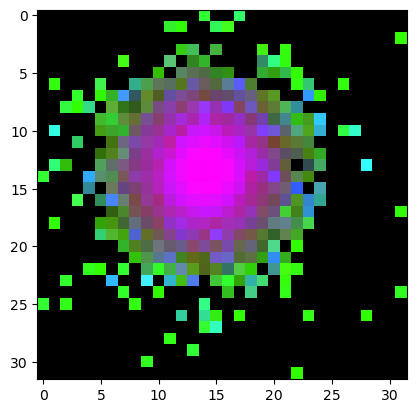

energy: -1.2677284479141235
sin_z: 0.12762866914272308
cos_z: -1.0384361743927002
sin_a: -0.8354803323745728
cos_a: -1.135901927947998


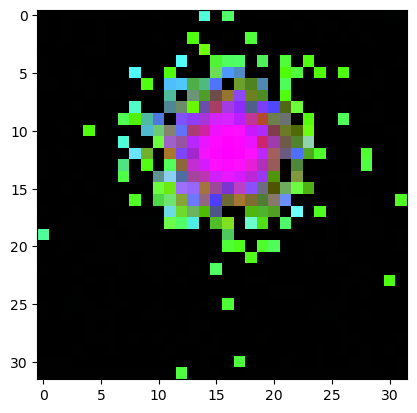

energy: 0.10835196077823639
sin_z: -1.4165066480636597
cos_z: 1.3893961906433105
sin_a: 0.9299746751785278
cos_a: 1.0703794956207275


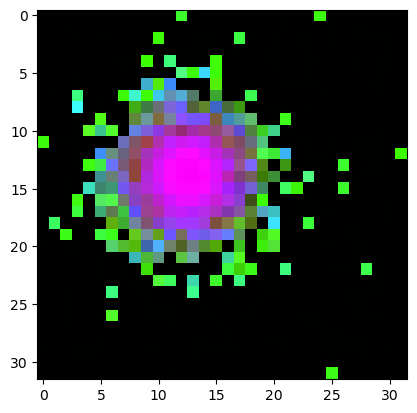

energy: -0.0889512449502945
sin_z: 1.1705459356307983
cos_z: 0.11447214335203171
sin_a: 0.164367213845253
cos_a: 1.4006659984588623


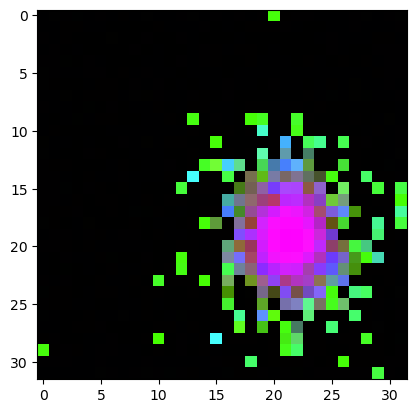

energy: 0.479263573884964
sin_z: -0.5985520482063293
cos_z: -1.2575494050979614
sin_a: -1.381338357925415
cos_a: 0.2683996558189392


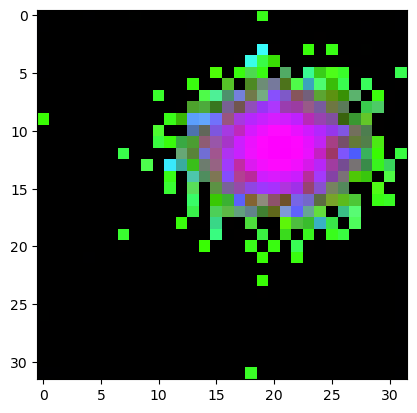

energy: 0.42093828320503235
sin_z: 0.8151582479476929
cos_z: 0.6550753116607666
sin_a: 0.6693565845489502
cos_a: 1.2465424537658691


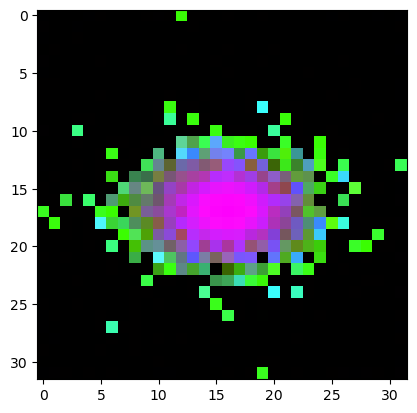

energy: 0.07224036008119583
sin_z: -1.2939120531082153
cos_z: 1.3773328065872192
sin_a: 0.718667209148407
cos_a: -1.2244240045547485


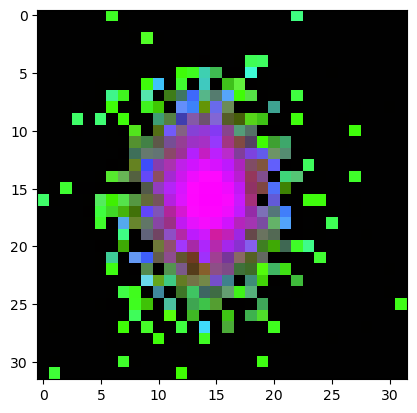

energy: -1.3771936893463135
sin_z: 0.4684164822101593
cos_z: -0.8797246813774109
sin_a: -0.14237074553966522
cos_a: 1.401064157485962


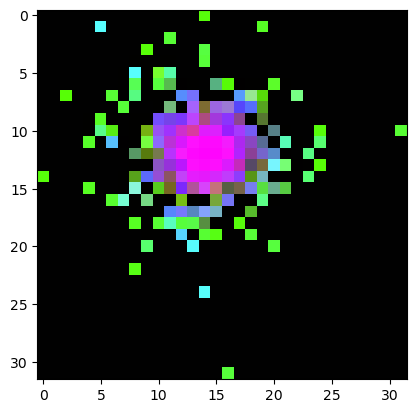

energy: 1.4320722818374634
sin_z: 0.691144585609436
cos_z: -0.742603063583374
sin_a: -1.2150150537490845
cos_a: 0.7082010507583618


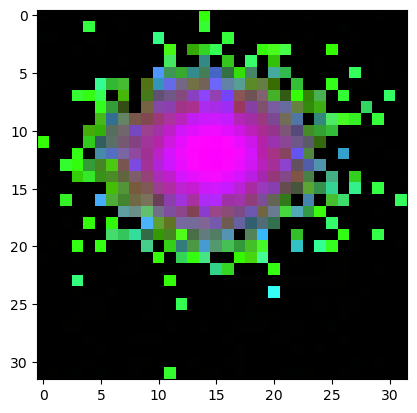

energy: 0.7480071783065796
sin_z: 0.6391210556030273
cos_z: 0.7851744890213013
sin_a: 1.2109169960021973
cos_a: 0.74522864818573


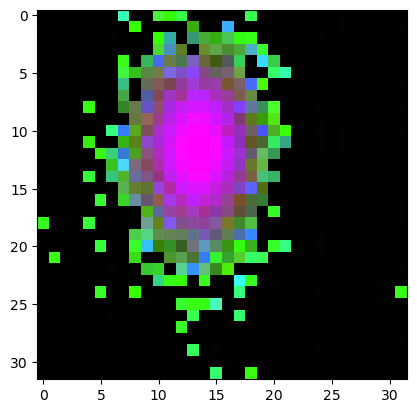

In [23]:
import matplotlib.pyplot as plt


for output in outputs:
    condition_name = [ 'energy', 'sin_z', 'cos_z', 'sin_a', 'cos_a']
    for icondition, condition in enumerate(output['condition']):
        print(f"{condition_name[icondition]}: {condition}")

    output_mean = output['images'].mean(dim=0)
    output_mean = output_mean.permute(1, 2, 0)  # Change from (C, H, W) to (H, W, C) if needed
    # normalize between 0 and 1
    output_mean = (output_mean - output_mean.min()) / (output_mean.max() - output_mean.min())
    plt.imshow(output_mean.cpu(), cmap='viridis') 
    plt.show()